In [2]:
#load libraries and setup file
import sys,os
root_path = os.path.abspath(os.path.join('..'))
print(root_path)
if root_path not in sys.path:
    sys.path.append(root_path)
%run -i "../lib/utils/ipynb_setup.py"
%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\mptouzel\Dropbox\scripts\Projects\decisionmaking\code\oppcosts


In [3]:
#plotting
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : False})
pl.rc("figure", facecolor="white",figsize = (8,8))
#pl.rc("figure", facecolor="gray",figsize = (8,8))
pl.rc('text', usetex=True)
pl.rc('text.latex', preamble=[r'\usepackage{amsmath}'])
pl.rc('lines',markeredgewidth = 2)
pl.rc('font',size = 10)

first figure

../lib/utils/ipynb_setup.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
../lib/utils/ipynb_setup.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  #notebook config
../lib/utils/ipynb_setup.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argume

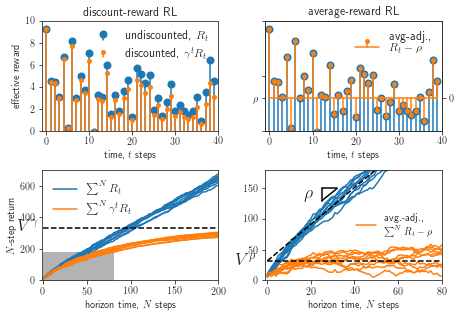

In [4]:
fig,ax=pl.subplots(2,2,figsize=(6.5,4.5))
axtwin=ax[0,1].twinx()
time=np.arange(100000)
gamma=0.99
num_seeds=10
tmax=40
thor=200
indmax=tmax
rho=3
ymax=10
ymax2=700
dis_rew_store=[]

for seed in range(1,num_seeds+1):
    np.random.seed(seed)
    
    tau=10
    state_dep=rho/10*tau*np.exp(-time/tau)
    reward_seq=2*np.random.standard_normal(time.size)+rho+state_dep
    discounted_reward=reward_seq[:thor]*np.power(gamma,time[:thor])
    dis_rew_store.append(np.sum(reward_seq*np.power(gamma,time)))

    if seed==1:
        rho_samp=np.mean(reward_seq)
        ax[0,0].stem(time[:indmax],reward_seq[:indmax],basefmt=" ",label=r'undiscounted, $R_t$')
        ax[0,0].stem(time[:indmax],discounted_reward[:indmax],markerfmt='C1.',basefmt=" ",linefmt='C1',label=r'discounted, $\gamma^tR_t$')

        ax[0,1].stem(time[:indmax],reward_seq[:indmax],basefmt=" ")
        ax[0,1].stem(time[:indmax],reward_seq[:indmax],bottom=np.mean(reward_seq),markerfmt='C1.',linefmt='C1',basefmt='C1-',label='avg-adj.,\n'+r"$R_t-\rho$")

        ax[1,0].plot(time[:thor],np.cumsum(reward_seq[:thor]),'C0-',label=r'$\sum^N R_t$')
        ax[1,0].plot(time[:thor],np.cumsum(discounted_reward[:thor]),'C1-',label=r'$\sum^N\gamma^t R_t$')
    
        ax[1,1].plot(time[:thor],np.cumsum(reward_seq[:thor]),'C0-')
        ax[1,1].plot(time[:thor],np.cumsum(reward_seq[:thor])-rho*time[:thor],'C1-',label='avg.-adj.,\n'+r"$\sum^N R_t-\rho$")
    else:
        ax[1,0].plot(time[:thor],np.cumsum(reward_seq[:thor]),'C0-')
        ax[1,0].plot(time[:thor],np.cumsum(discounted_reward[:thor]),'C1-')
    
        ax[1,1].plot(time[:thor],np.cumsum(reward_seq[:thor]),'C0-')
        ax[1,1].plot(time[:thor],np.cumsum(reward_seq[:thor])-rho*time[:thor],'C1-')

ax[0,0].set_ylabel('effective reward')
ax[0,0].set_xlabel(r'time, $t$ steps')
ax[0,0].set_title('discount-reward RL')
ax[0,0].set_ylim(0,ymax)
ax[0,0].set_xlim(-1,tmax)
ax[0,0].legend(frameon=False,prop={"size":12})
        
ax[0,1].set_ylim(0,ymax)
# ax[0,1].set_ylabel('reward')
ax[0,1].set_title('average-reward RL')
ax[0,1].set_xlabel(r'time, $t$ steps')
axtwin.set_yticks([0])
axtwin.set_ylim(-rho,10-rho)
ax[0,1].set_yticks([0,rho,5,10])
ax[0,1].set_yticklabels(['',r'$\rho$','',''])
ax[0,1].set_xlim(-1,tmax)
ax[0,1].legend(frameon=False,prop={"size":12})
        
ax[1,0].set_ylabel(r'$N$-step return')
ax[1,0].legend(frameon=False,prop={"size":12})
ax[1,0].set_xlabel(r'horizon time, $N$ steps')
ax[1,0].set_ylim(0,ymax2)
ax[1,0].set_xlim(-1,thor)
ax[1,0].fill_between([0,80],[0, 0],[180,180],color=[0.7]*3)
ax[1,0].plot(time[:thor],[np.mean(np.asarray(dis_rew_store))]*thor,'k--')
ax[1,0].text(-30,np.mean(np.asarray(dis_rew_store))-15,r"$V^{\gamma}$",fontsize=18)   
# ax[1,0].text(130,np.mean(np.asarray(dis_rew_store))/2-30,r"$\tau(\gamma)\sum\gamma^tR_t$",fontsize=18)  

ax[1,1].set_xlabel(r'horizon time, $N$ steps')    
# ax[1,1].set_ylabel(r'$t$-step return')
ax[1,1].legend(frameon=False,prop={"size":10})
ax[1,1].set_xlim(-1,80)
ax[1,1].set_ylim(0,180)
ax[1,1].plot(time[:thor],rho*time[:thor]+np.sum(state_dep),'k--')
ax[1,1].plot(time[:thor],[np.sum(state_dep)]*thor,'k--')
ax[1,1].text(-15,np.sum(state_dep)-5,r"$V^\rho$",fontsize=18)
ax[1,1].plot([25,32],[150,150],'k-')
ax[1,1].plot([25,32],[130,150],'k-')
ax[1,1].plot([25,25],[130,150],'k-')
ax[1,1].text(17,135,r"$\rho$",fontsize=18)


fig.tight_layout()
# fig.savefig('AR_RL_schematic.pdf',transparent=True,bbox_inches='tight',dpi=300)


No handles with labels found to put in legend.


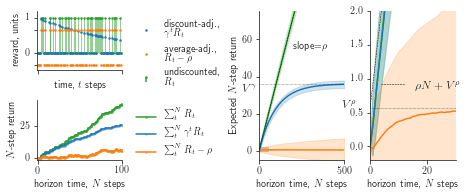

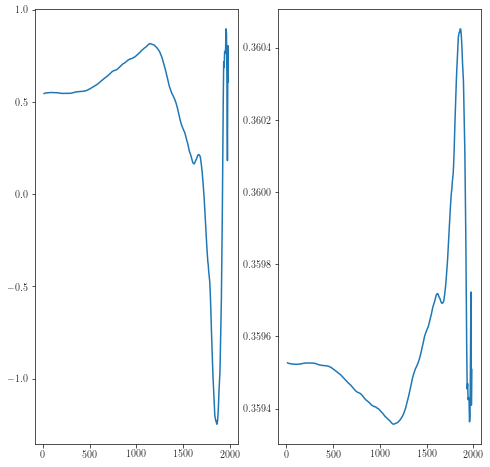

In [489]:
fig=pl.figure(figsize=(7.5,2.75))
ax=[0,0,0,0]
ax[0]=fig.add_subplot(241)
ax[1]=fig.add_subplot(245)
ax[2]=fig.add_subplot(143)
ax[3]=fig.add_subplot(144)
gamma=0.99
num_seeds=4000
tmax=100
thor=2000
mean_interval=3
num_rewards=1000
rew_store=np.zeros((num_seeds,thor))
gray_value=0.6
rho_samp=0.3596836842105263#np.mean(rew_store[100:,:])
for seed in range(1,num_seeds+1):
    np.random.seed(seed)
    
    tau=10/3
    state_dep=-mean_interval/10*tau*np.exp(-np.arange(num_rewards)/tau)
    reward_time_seq=mean_interval/2*np.random.standard_normal(num_rewards)+mean_interval+state_dep
    reward_time_seq=np.floor(reward_time_seq).astype(int)
    reward_time_seq=reward_time_seq[reward_time_seq>0]
    reward_seq=np.zeros(np.sum(reward_time_seq)+1)
    reward_seq[np.cumsum(reward_time_seq)]=1
    time=np.arange(len(reward_seq))
    discounted_reward=reward_seq*np.power(gamma,time)
    rew_store[seed-1,:]=reward_seq[:thor]
    if seed==1:
#         ax[0].plot(time[:tmax],reward_seq[:tmax],'.',color='C2',ms=1,label='undiscounted,\n'+r"$R_t$")
#         ax[0].plot(time[:tmax]-0.1,(gamma**(time[:tmax]))*reward_seq[:tmax],'C0.',ms=0.5,label='discount-adj.,\n'+"$\gamma^tR_t$")
#         ax[0].plot(time[:tmax],reward_seq[:tmax]-rho_samp*np.ones(tmax),'C1.',ms=1,label="average-adj.,\n"+r"$R_t-\rho$")
        markerline, stemline, baseline,=ax[0].stem(time[:tmax],reward_seq[:tmax],markerfmt='C2.',basefmt=" ",linefmt='C2',label='undiscounted,\n'+r"$R_t$",use_line_collection=True)
        pl.setp(stemline, linewidth = 0.5)
        pl.setp(markerline, markersize = 5)
        pl.setp(markerline, markerfacecolor = 'C2')
        pl.setp(markerline, markeredgecolor = 'None')
        ax[0].plot(time[:tmax]-0.1,(gamma**(time[:tmax]))*reward_seq[:tmax],'C0.',ms=5,mfc='C0',mec='None',label='discount-adj.,\n'+"$\gamma^tR_t$")
        ax[0].plot(time[:tmax],reward_seq[:tmax]-rho_samp*np.ones(tmax),'C1.',ms=5,mfc='C1',mec='None',label="average-adj.,\n"+r"$R_t-\rho$")
       
        ax[1].step(time[:thor],np.cumsum(reward_seq[:thor]),'.-',color='C2',ms=1,where='post',label=r'$\sum_t^N R_t$')
        ax[1].step(time[:thor]-0.1,np.cumsum((gamma**(time[:thor]))*reward_seq[:thor]),'C0.-',ms=0.5,where='post',label=r'$\sum_t^N \gamma^tR_t$')
        ax[1].step(time[:thor],np.cumsum(reward_seq[:thor])-rho_samp*np.arange(thor),'C1.-',ms=1,where='post',label=r"$\sum_t^N R_t-\rho$")

ax[0].set_ylabel('reward,   units')
ax[0].set_xlabel(r'time, $t$ steps')
ax[0].set_xticklabels([])
ax[0].set_yticks([-rho_samp,0,1-rho_samp,1])
ax[0].set_yticklabels(['',r'$0$','',r'$1$'])
ax[0].set_ylim(-0.5,1.2)
ax[0].set_xlim(-1,tmax+1)
ax[0].legend(frameon=False,prop={"size":10},loc='upper left',bbox_to_anchor=(1.05, 1))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].set_ylabel(r'$N$-step return')
ax[1].set_xlabel(r'horizon time, $N$ steps')
ax[1].set_ylim(-2,45)
ax[1].set_xlim(-1,tmax+1)
ax[1].legend(frameon=False,prop={"size":10},loc='upper left',bbox_to_anchor=(1.05, 1))
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
bvec=[]
mvec=[]
tvec=np.arange(10,len(rew_store[0,:])-10,5)
for start_ind in tvec:
    data=np.mean(np.cumsum(rew_store,axis=1)[:,start_ind:],axis=0)
    timevec=np.arange(start_ind,rew_store.shape[1])
    m, b = np. polyfit(timevec, data, 1)
    bvec.append(b)
    mvec.append(m)
figb,axb=pl.subplots(1,2)
axb[0].plot(tvec,bvec)
axb[1].plot(tvec,mvec)
b=bvec[int(len(bvec)/4)]
m=mvec[int(len(bvec)/4)]

ax[2].fill_between([-1,50],[-0.3,-0.3],[2,2],color=[0.6]*3,alpha=0.5)
tmax=500
df=pd.DataFrame(data=np.cumsum(rew_store[:,:tmax],axis=1),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='x')
sns.lineplot(ax=ax[2],x='iter',y='x',data=df,ci='sd',color='C2')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
sns.lineplot(ax=ax[3],x='iter',y='x',data=df,ci='sd',color='C2')

df=pd.DataFrame(data=np.cumsum(np.power(gamma,np.arange(len(rew_store[0,:tmax])))*rew_store[:,:tmax],axis=1),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='y')
sns.lineplot(ax=ax[2],x='iter',y='y',data=df,ci='sd')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
sns.lineplot(ax=ax[3],x='iter',y='y',data=df,ci='sd')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))

df=pd.DataFrame(data=np.cumsum(rew_store[:,:tmax],axis=1)-rho_samp*np.arange(tmax),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='z')
sns.lineplot(ax=ax[2],x='iter',y='z',data=df,ci='sd',legend='full')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
sns.lineplot(ax=ax[3],x='iter',y='z',data=df,ci='sd')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))

dis_value=np.mean(np.sum(np.power(gamma,np.arange(len(rew_store[0,:])))*rew_store,axis=1))
# avg_value=np.mean(np.sum(rew_store-rho_samp,axis=1))
timevec=np.arange(len(rew_store[0,:tmax]))
# ax[1].plot(timevec,m*timevec+b,'k--')
ax[2].plot(timevec,dis_value*np.ones(timevec.shape),'k:',lw=0.5)
ax[2].set_ylabel(r'Expected $N$-step return')
ax[2].set_xlabel(r'horizon time, $N$ steps')
ax[2].text(-100,dis_value-4.5,r"$V^{\gamma}$",fontsize=12)   
ax[2].text(200,55,r"slope=$\rho$",fontsize=10)
ax[2].legend(frameon=False)
ax[2].set_ylim(-5,200*rho_samp*1.05)
ax[2].set_xlim(-1,tmax)
ax[2].plot(timevec,m*timevec+b,'k--',label=r'$\rho N+V^\rho$',lw=0.5)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[3].plot(timevec,m*timevec+b,'k--',label=r'$\rho N+V^\rho$',lw=0.5)
ax[3].plot(timevec,b*np.ones(timevec.shape),'k:',lw=0.5)
tmin=0
ax[3].set_xlim(tmin,30)
ax[3].set_ylim(-0.2,2)
ax[3].set_xlabel(r'horizon time, $N$ steps')
ax[3].set_ylabel(None)
ax[3].text(tmin-10,b,r"$V^{\rho}$",fontsize=12) 
# ax[2].text(20,3.5,r'$V^{\gamma \to 1}=\rho N+V^{\rho}$',fontsize=12) 
ax[3].legend(frameon=False,prop={"size":12})
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
# fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.savefig('AR_RL_schematic.pdf',transparent=True,bbox_inches='tight',dpi=300)

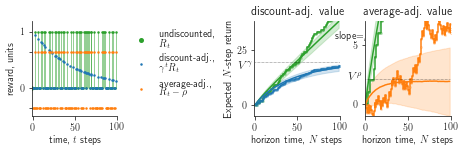

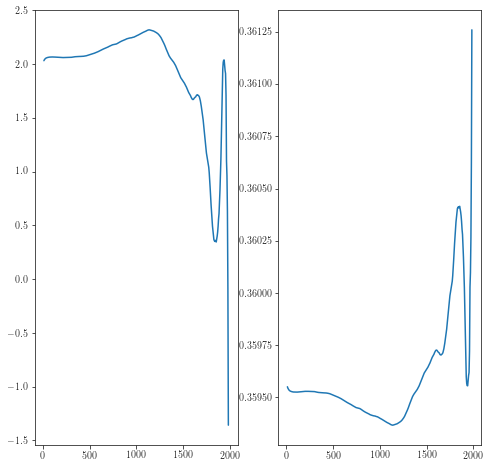

In [30]:
# fig,ax=pl.subplots(1,4,figsize=(7.5,2.75))
# fig2,ax2=pl.subplots(,figsize=(7.5,2.75))
fig,ax=pl.subplots(1,4,figsize=(7.5,1.75))
# figure(figsize=(7.5,2.75))
# ax=[0,0,0,0]
# ax[0]=fig.add_subplot(241)
# ax[1]=fig.add_subplot(245)
# ax[2]=fig.add_subplot(143)
# ax[3]=fig.add_subplot(144)
gamma=0.98
num_seeds=4000
tmax=100
thor=2000
mean_interval=3
num_rewards=1000
rew_store=np.zeros((num_seeds,thor))
gray_value=0.6
# rho_samp=0.3596836842105263#np.mean(rew_store[100:,:])
for seed in range(1,num_seeds+1):
    np.random.seed(seed)
    
    tau=20/3
    state_dep=-mean_interval/10*tau*np.exp(-np.arange(num_rewards)/tau)
    reward_time_seq=mean_interval/2*np.random.standard_normal(num_rewards)+mean_interval+state_dep
    reward_time_seq=np.floor(reward_time_seq).astype(int)
    reward_time_seq=reward_time_seq[reward_time_seq>0]
    reward_seq=np.zeros(np.sum(reward_time_seq)+1)
    reward_seq[np.cumsum(reward_time_seq)]=1
    time=np.arange(len(reward_seq))
    rho_samp=np.sum(reward_seq)/time[-1]
    discounted_reward=reward_seq*np.power(gamma,time)
    rew_store[seed-1,:]=reward_seq[:thor]
    if seed==1:
#         ax[0].plot(time[:tmax],reward_seq[:tmax],'.',color='C2',ms=1,label='undiscounted,\n'+r"$R_t$")
#         ax[0].plot(time[:tmax]-0.1,(gamma**(time[:tmax]))*reward_seq[:tmax],'C0.',ms=0.5,label='discount-adj.,\n'+"$\gamma^tR_t$")
#         ax[0].plot(time[:tmax],reward_seq[:tmax]-rho_samp*np.ones(tmax),'C1.',ms=1,label="average-adj.,\n"+r"$R_t-\rho$")
        markerline, stemline, baseline,=ax[0].stem(time[:tmax],reward_seq[:tmax],markerfmt='C2.',basefmt=" ",linefmt='C2',use_line_collection=True)
        pl.setp(stemline, linewidth = 0.5)
        pl.setp(markerline, markersize = 5)
        pl.setp(markerline, markerfacecolor = 'C2')
        pl.setp(markerline, markeredgecolor = 'None')
        ax[0].plot([-2],[0],'C2.',label='undiscounted,\n'+r"$R_t$",)
        ax[0].plot(time[:tmax]-0.1,(gamma**(time[:tmax]))*reward_seq[:tmax],'C0.',ms=5,mfc='C0',mec='None',label='discount-adj.,\n'+"$\gamma^tR_t$")
        ax[0].plot(time[:tmax],reward_seq[:tmax]-rho_samp*np.ones(tmax),'C1.',ms=5,mfc='C1',mec='None',label="average-adj.,\n"+r"$R_t-\rho$")
        for tit,tmpax in enumerate((ax[2],ax[3])):
            tmpax.step(time[:thor],np.cumsum(reward_seq[:thor]),'.-',color='C2',ms=0.5,where='post',label=r'$\sum_t^N R_t$')
            if tit==0:
                tmpax.step(time[:thor]-0.1,np.cumsum((gamma**(time[:thor]))*reward_seq[:thor]),'C0.-',ms=0.5,where='post',label=r'$\sum_t^N \gamma^tR_t$')
            else:
                tmpax.step(time[:thor],np.cumsum(reward_seq[:thor])-rho_samp*np.arange(thor),'C1.-',ms=0.5,where='post',label=r"$\sum_t^N R_t-\rho$")

ax[0].set_ylabel('reward,   units')
ax[0].set_xlabel(r'time, $t$ steps')
ax[0].set_yticks([-rho_samp,0,1-rho_samp,1])
ax[0].set_yticklabels(['',r'$0$','',r'$1$'])
ax[0].set_ylim(-0.5,1.2)
ax[0].set_xlim(-1,tmax+1)
ax[0].set_xticks([0,50,100])
ax[0].legend(frameon=False,prop={"size":10},loc='upper left',bbox_to_anchor=(1.05, 1))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax[1].set_ylabel(r'$N$-step return')
# ax[1].set_xlabel(r'horizon time, $N$ steps')
# ax[1].set_ylim(-2,45)
# ax[1].set_xlim(-1,tmax+1)
# ax[1].legend(frameon=False,prop={"size":10},loc='upper left',bbox_to_anchor=(1.05, 1))
# ax[1].spines['right'].set_visible(False)
# ax[1].spines['top'].set_visible(False)
bvec=[]
mvec=[]
tvec=np.arange(10,len(rew_store[0,:])-10,5)
for start_ind in tvec:
    data=np.mean(np.cumsum(rew_store,axis=1)[:,start_ind:],axis=0)
    timevec=np.arange(start_ind,rew_store.shape[1])
    m, b = np. polyfit(timevec, data, 1)
    bvec.append(b)
    mvec.append(m)
figb,axb=pl.subplots(1,2)
axb[0].plot(tvec,bvec)
axb[1].plot(tvec,mvec)
b=bvec[int(len(bvec)/4)]
m=mvec[int(len(bvec)/4)]

# ax[2].fill_between([-1,50],[-0.3,-0.3],[2,2],color=[0.6]*3,alpha=0.5)
tmax=100
df=pd.DataFrame(data=np.cumsum(rew_store[:,:tmax],axis=1),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='x')
sns.lineplot(ax=ax[2],x='iter',y='x',data=df,ci='sd',color='C2')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
sns.lineplot(ax=ax[3],x='iter',y='x',data=df,ci='sd',color='C2')

df=pd.DataFrame(data=np.cumsum(np.power(gamma,np.arange(len(rew_store[0,:tmax])))*rew_store[:,:tmax],axis=1),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='y')
sns.lineplot(ax=ax[2],x='iter',y='y',data=df,ci='sd',color='C0')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
# sns.lineplot(ax=ax[3],x='iter',y='y',data=df,ci='sd')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))

df=pd.DataFrame(data=np.cumsum(rew_store[:,:tmax],axis=1)-rho_samp*np.arange(tmax),columns=(np.arange(len(rew_store[0,:tmax]))).tolist()).melt(var_name='iter',value_name='z')
# sns.lineplot(ax=ax[2],x='iter',y='z',data=df,ci='sd',legend='full')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))
sns.lineplot(ax=ax[3],x='iter',y='z',data=df,ci='sd',color='C1')#,style=r'$\alpha$',hue=r'$\beta$',ci='sd',legend=leg_str[pit],palette=sns.color_palette("colorblind", 2))

dis_value=np.mean(np.sum(np.power(gamma,np.arange(len(rew_store[0,:])))*rew_store,axis=1))
# avg_value=np.mean(np.sum(rew_store-rho_samp,axis=1))
timevec=np.arange(len(rew_store[0,:tmax]))
# ax[1].plot(timevec,m*timevec+b,'k--')
ax[2].plot(timevec,dis_value*np.ones(timevec.shape),'k:',lw=0.5,clip_on=False)
ax[2].set_ylabel(r'Expected $N$-step return')
ax[2].set_xlabel(r'horizon time, $N$ steps')
ax[2].text(-20,dis_value-2.5,r"$V^{\gamma}$",fontsize=12)   
ax[2].text(95,30,r"slope=$\rho$",fontsize=10,zorder=4)
# ax[2].legend(frameon=False)
ax[2].set_ylim(-5,100*rho_samp*1.05)
ax[2].set_yticks([0,25])
ax[2].set_xlim(-1,tmax)
ax[2].set_xticks([0,50,100])
# ax[2].plot(timevec,m*timevec+b,'k--',label=r'$\rho N+V^\rho$',lw=0.5)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set_title('discount-adj. value')
ax[2].get_legend().remove()
# ax[3].plot(timevec,m*timevec+b,'k--',label=r'$\rho N+V^\rho$',lw=0.5)
ax[3].plot(timevec,b*np.ones(timevec.shape),'k:',lw=0.5)
tmin=0
ax[3].set_xlim(tmin,100)
ax[3].set_ylim(-1,7)
ax[3].set_xlabel(r'horizon time, $N$ steps')
ax[3].set_ylabel(None)
ax[3].text(tmin-20,b,r"$V^{\rho}$",fontsize=12) 
ax[3].set_title('average-adj. value')
ax[3].set_yticks([0,5])
ax[3].set_xticks([0,50,100])
# ax[2].text(20,3.5,r'$V^{\gamma \to 1}=\rho N+V^{\rho}$',fontsize=12) 
# ax[3].legend(frameon=False,prop={"size":12})
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].get_legend().remove()
ax[1].axis('off')
# fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.savefig('AR_RL_schematic_v2.pdf',transparent=True,bbox_inches='tight',dpi=300)

In [16]:
rho_samp

0.3609657947686117

In [341]:
m

0.35964256877634837

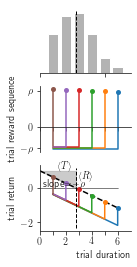

In [476]:
fig2=pl.figure(figsize=(6.5/4,2.75*3/2))
ax2 = [0, 0, 0]
tmax=7

ax2[2] = fig2.add_subplot(313)
ax2[2].plot([0,6],[0,0],'k-',lw=0.5)
# ax2[2].spines["bottom"].set_position('zero')
ax2[1] = fig2.add_subplot(312, sharex=ax2[2])
ax2[1].spines["bottom"].set_position('zero')

trial_return_by_duration_AR=[]
trial_return_by_duration_dis=[]
for t in range(7):
    trial_return_by_duration_AR.append(-rho_samp * t  + 1)
    trial_return_by_duration_dis.append(1)
ax2[2].plot(range(7), trial_return_by_duration_AR,'k--')

for t in range(1,7)[::-1]:
    p=ax2[1].plot(np.insert(np.arange(1,t+1),-1,t), np.asarray([-rho_samp] * t + [-rho_samp + 1])+(0.04-0.01*t), "-")
    ax2[1].plot([t],[-rho_samp+(0.04-0.01*t)+1],".",color=p[-1].get_color())
    
#     ax2[2].plot(np.insert(np.arange(1,t+1),-1,t),np.cumsum(np.asarray([0] * t + [gamma**t + 1]))+(0.04-0.01*t) , "-",color=p[-1].get_color())
#     ax2[2].plot([t],[gamma**t+(0.04-0.01*t)+1],".",color=p[-1].get_color())
    ax2[2].plot(np.insert(np.arange(1,t+1),-1,t),  np.append(np.cumsum(-rho_samp*np.ones(t)), -rho_samp*t + 1)+0.04-0.01*t, "-",color=p[-1].get_color())
    ax2[2].plot([t],[-t*rho_samp+1+(0.04-0.01*t)],".",color=p[-1].get_color())
    

ax2[2].plot([meanT] * 2, ax2[2].get_ylim(), "k--", lw=1)
ax2[2].spines["right"].set_visible(False)
ax2[2].spines["top"].set_visible(False)
ax2[2].set_xlim(0,tmax)
ax2[2].set_ylabel(r"$N$-step return")
ax2[2].fill_between([0,meanT],[1,0],[1, 1],color=[0.6]*3,alpha=0.5)
ax2[2].text(0.2, 0.1, r"slope=$-\rho$")
ax2[2].text(meanT*1.1, 0.5, r"$\langle R\rangle$")
ax2[2].text(meanT*0.5, 1.1, r"$\langle T\rangle$")
ax2[2].set_xticks(range(7))
ax2[2].set_xlabel('trial duration', horizontalalignment='right', x=1.0)
ax2[2].set_xticklabels([r"$0$","",r"$2$","",r"$4$","",r"$6$"])

ax2[0] = fig2.add_subplot(311,sharex=ax[2])
counts, bins = np.histogram(reward_time_seq, np.arange(tmax+1))
meanT = np.mean(reward_time_seq)
ax2[0].bar(bins[:-1], counts, color=[0.7] * 3, edgecolor=None)
ax2[0].plot([meanT] * 2, ax2[0].get_ylim(), "k--", lw=1)
ax2[0].set_yticks([])
ax2[0].spines["right"].set_visible(False)
ax2[0].spines["top"].set_visible(False)
ax2[0].spines["left"].set_visible(False)
# ax2[0].set_title(r"distribution of trial duration")
pl.setp(ax2[0].get_xticklabels(), visible=False)
ax2[0].set_xlim(0,tmax)

ax2[1].set_ylabel("reward sequence")
ax2[1].set_yticks([-rho_samp, 0, 1 - rho_samp])
ax2[1].set_yticklabels([r"$-\rho$", r"$0$", r"$\rho$"])
ax2[1].spines["right"].set_visible(False)
ax2[1].spines["top"].set_visible(False)
pl.setp(ax2[1].get_xticklabels(), visible=False)

fig2.subplots_adjust(wspace=0, hspace=0.2)

fig2.savefig('AR_RL_schematic_trial.pdf',transparent=True,bbox_inches='tight',pad_inches=0,dpi=300)

self-avoiding walk

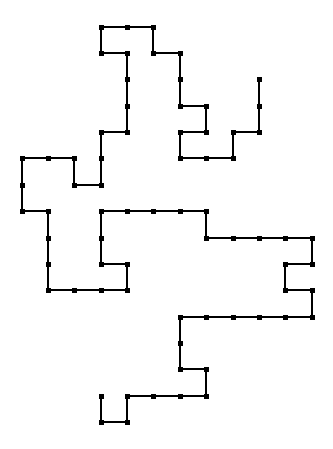

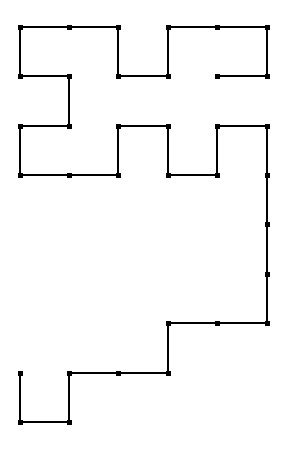

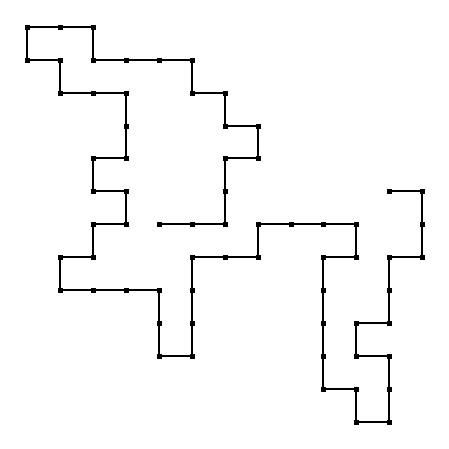

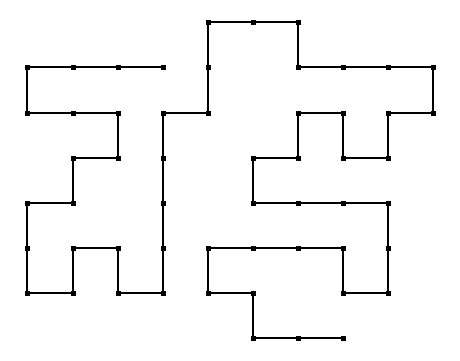

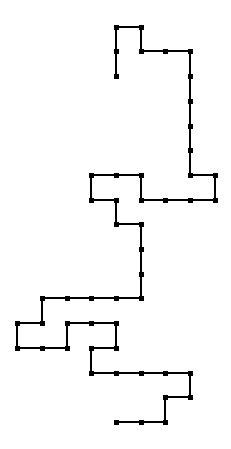

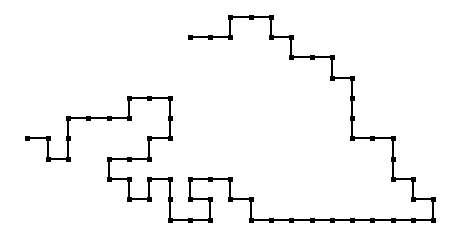

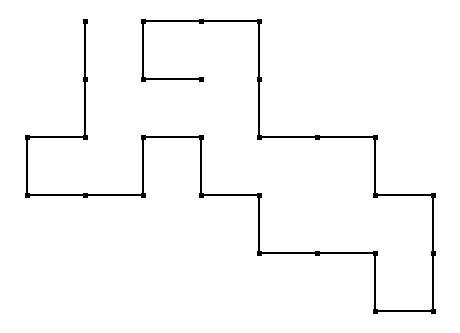

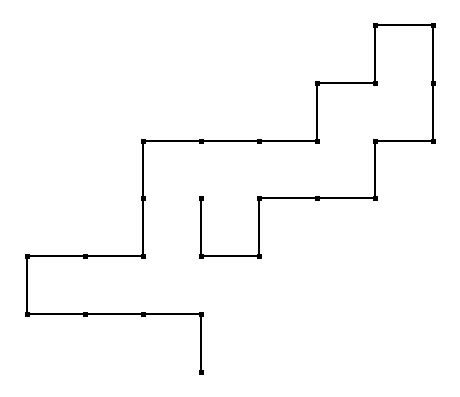

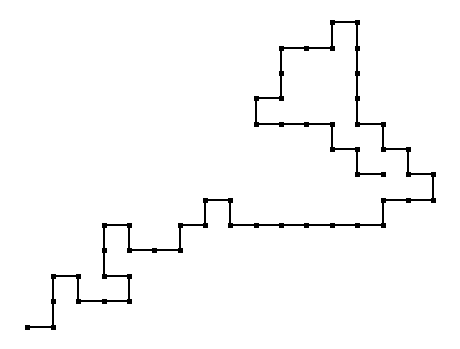

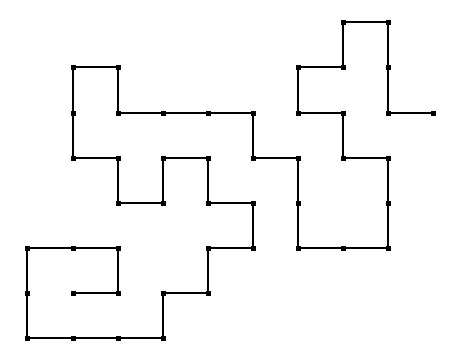

In [98]:
np.random.seed(1)
moves_x=np.asarray([1,0,-1,0])
moves_y=np.asarray([0,1,0,-1])

move_seq=np.random.randint(4,size=(150),dtype=int)
moves=np.vstack([np.cumsum(moves_x[move_seq]),np.cumsum(moves_y[move_seq])]).T
new_moves=np.zeros(moves.shape)
tmax=100

for it in range(10):
    state=[0,0]
    state_store=[]
    for t in range(tmax):
        if state not in state_store:
            state_store.append(state)
        else:
            state=state_store[-1]
        move_idx=np.random.randint(4)
        move=[moves_x[move_idx],moves_y[move_idx]]
        state=[val+move for val,move in zip(state,move)]
    state_traj_x,state_traj_y = zip(*state_store)
    fig,ax=pl.subplots()
    for step in range(len(x_steps)-1):
        ax.plot(state_traj_x,state_traj_y,'k.-')
    ax.set_aspect(1)
    ax.axis('off')